# 1) Delivery_time -> Predict delivery time using sorting time





Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [41]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
# import dataset
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (2).csv


In [43]:
# read dataset
data=pd.read_csv("delivery_time.csv")
data


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data visualization

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-45-681aa28aaa28>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

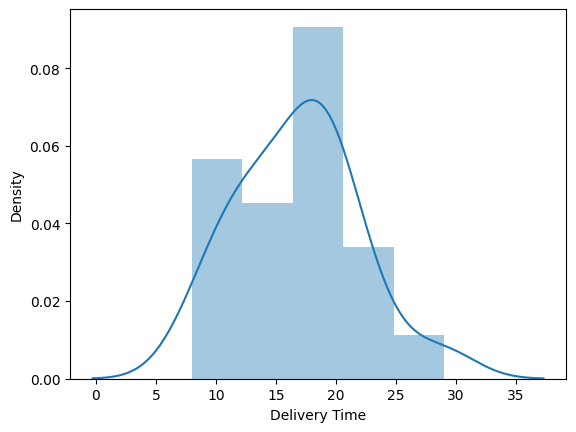

In [45]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

<ipython-input-46-0d3921a40cdf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

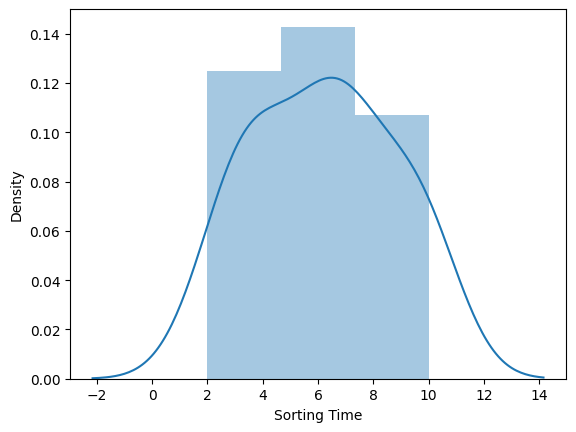

In [46]:
import seaborn as sns
sns.distplot(data["Sorting Time"])

In [47]:
# Renaming columns
data=data.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [48]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


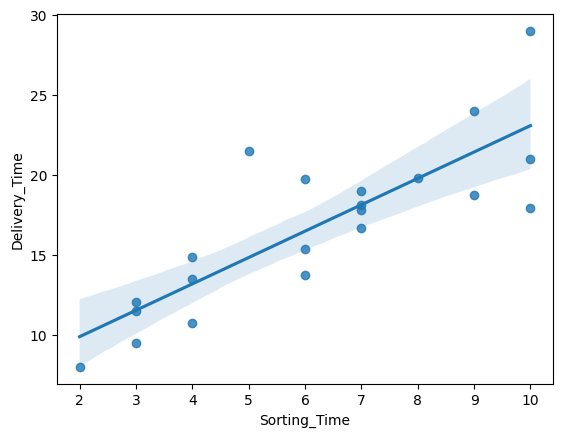

In [49]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time" , data=data);

# Transformation (log)

In [32]:

data[['Delivery_Time','Sorting_Time']] = np.log(data[['Delivery_Time','Sorting_Time']])
data[['Delivery_Time','Sorting_Time']]

,Delivery_Time,Sorting_Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


# Fitting a Simple Linear Regression Model

# model building

In [33]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data=data).fit()

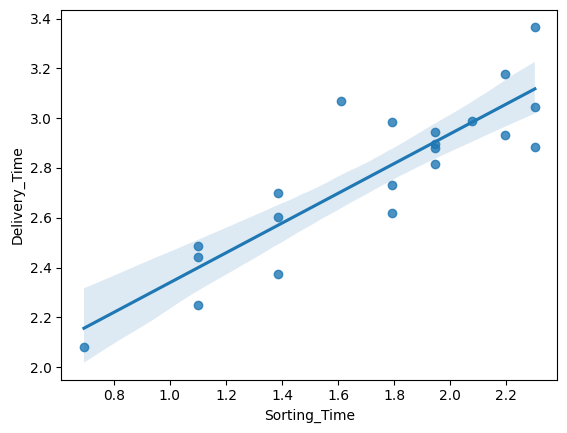

In [34]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time" , data=data);

# model testing

In [35]:
# coefficient parameters
model.params

Intercept       1.741987
Sorting_Time    0.597522
dtype: float64

In [36]:
# Rsquared and adjusted_Rsquared values
model.rsquared,model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

# model predictions

In [37]:
#Predict for 5 and 10 sorted_time
newdata=pd.Series([5,10])

In [38]:
data_pred=pd.DataFrame(newdata,columns=["Sorting_Time"])

In [39]:
data_pred

,Sorting_Time
0,5
1,10


In [40]:
model.predict(data_pred)

0    4.729599
1    7.717210
dtype: float64

# Transformation(square root)

In [50]:

data[['Delivery_Time','Sorting_Time']] = np.sqrt(data[['Delivery_Time','Sorting_Time']])
data[['Delivery_Time','Sorting_Time']]

,Delivery_Time,Sorting_Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


# model building

In [51]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data=data).fit()

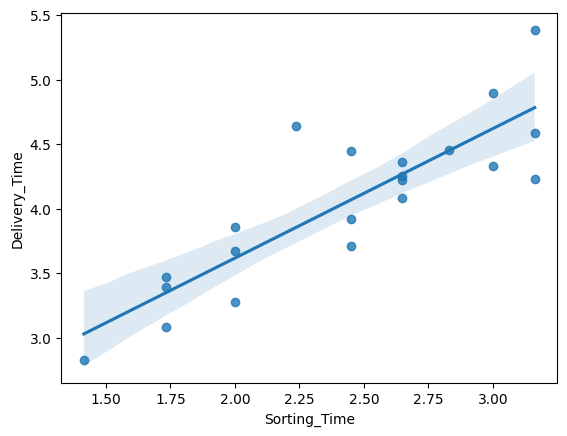

In [52]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time" , data=data);

# model testing

In [53]:
# coefficient parameters
model.params

Intercept       1.613479
Sorting_Time    1.002217
dtype: float64

In [54]:
# Rsquared and adjusted_Rsquared values
model.rsquared,model.rsquared_adj

(0.7292011987544665, 0.7149486302678596)

# model predictions

In [55]:
#Predict for 5 and 10 sorted_time
newdata=pd.Series([5,10])

In [56]:
data_pred=pd.DataFrame(newdata,columns=["Sorting_Time"])

In [57]:
data_pred

,Sorting_Time
0,5
1,10


In [58]:
model.predict(data_pred)

0     6.624563
1    11.635647
dtype: float64